In [62]:
# import the necessary packages
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt
import tqdm as tqdm
import glob
import uuid
from IPython.display import clear_output


sys.path.append("/Users/alex_wheelis/Documents/programming/red_wolf_detection/backend/algo_dev")
from misc import *

In [21]:
# cited: https://thedatafrog.com/en/articles/human-detection-video/

# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())


human_dataset = glob.glob("/Users/alex_wheelis/Documents/programming/red_wolf_detection/human_detection_dataset/1/*.png")

model_output_dir = "/Users/alex_wheelis/Documents/programming/red_wolf_detection/human_detector_output/"

human_count = 0

for img_f in tqdm.tqdm(human_dataset): 
    
    img = cv2.imread(img_f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    boxes, weights = hog.detectMultiScale(img, winStride=(8,8) )

    boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])

    for (xA, yA, xB, yB) in boxes:
        # display the detected boxes in the colour picture
        cv2.rectangle(img, (xA, yA), (xB, yB),(0, 255, 0), 2)
    if len(boxes):
        human_count += 1
#     img_f = img_f[img_f.rindex("/")+1:]
#     cv2.imwrite(model_output_dir + "pred_" + img_f, img)
#     print(model_output_dir + "pred_" + img_f)



100%|██████████| 559/559 [01:30<00:00,  6.15it/s]


In [22]:
accuracy = human_count/len(human_dataset)
print("accuracy: ", accuracy*100)

accuracy:  56.529516994633276


In [2]:
from imageai.Detection import ObjectDetection

detector = ObjectDetection()
detector.setModelTypeAsTinyYOLOv3()
detector.setModelPath("tiny-yolov3.pt")
detector.loadModel()

In [38]:
test_f =  "IMG_0141"
wolf_dir = "/Users/alex_wheelis/Documents/Fall2022/ECE 484/DCIM/100_BTCF/"
wolf_test_vid = wolf_dir + test_f + ".MP4"
wolf_test_vid

'/Users/alex_wheelis/Documents/Fall2022/ECE 484/DCIM/100_BTCF/IMG_0141.MP4'

In [39]:
wolf_test_vid = load_video(wolf_test_vid, start = 0, end = 1000, interval = 20)
for i,frame in enumerate(wolf_test_vid):
    plt.imsave(f'./test_vid_wolf/{test_f}_{i}.png', frame, cmap = 'gray')

In [40]:
human_dataset = glob("/Users/alex_wheelis/Documents/programming/red_wolf_detection/human_detection_dataset/1/*.png")
wolf_dataset = glob(f"/Users/alex_wheelis/Documents/programming/red_wolf_detection/backend/algo_dev/test_vid_wolf/{test_f}*.png")

In [31]:
len(wolf_dataset)

50

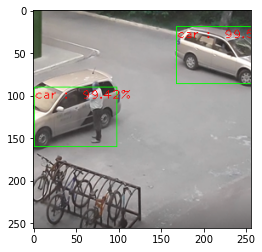

3
[{'name': 'car', 'percentage_probability': 99.55, 'box_points': [168, 19, 256, 86]}, {'name': 'car', 'percentage_probability': 99.42, 'box_points': [1, 90, 98, 160]}]


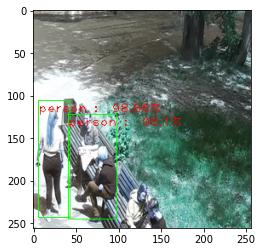

4
[{'name': 'person', 'percentage_probability': 98.86, 'box_points': [6, 106, 43, 243]}, {'name': 'person', 'percentage_probability': 98.1, 'box_points': [41, 122, 98, 245]}]


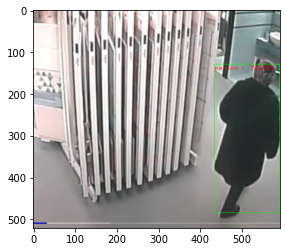

6
[{'name': 'person', 'percentage_probability': 76.99, 'box_points': [433, 129, 589, 484]}]


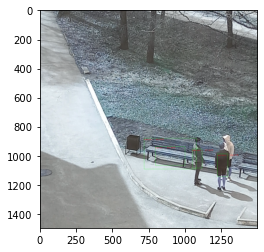

7
[{'name': 'person', 'percentage_probability': 99.07, 'box_points': [1218, 987, 1289, 1144]}, {'name': 'person', 'percentage_probability': 97.99, 'box_points': [1045, 953, 1112, 1084]}, {'name': 'bench', 'percentage_probability': 99.95, 'box_points': [714, 879, 1072, 1091]}, {'name': 'bench', 'percentage_probability': 99.96, 'box_points': [791, 936, 995, 1065]}]


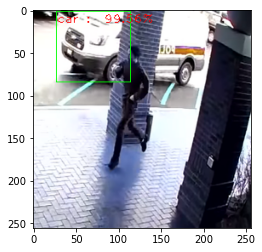

8
[{'name': 'car', 'percentage_probability': 99.56, 'box_points': [27, 1, 114, 84]}]


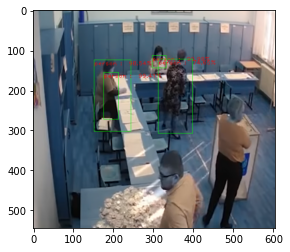

9
[{'name': 'person', 'percentage_probability': 99.99, 'box_points': [297, 113, 332, 144]}, {'name': 'person', 'percentage_probability': 98.54, 'box_points': [152, 124, 244, 302]}, {'name': 'person', 'percentage_probability': 99.41, 'box_points': [176, 155, 213, 272]}, {'name': 'person', 'percentage_probability': 74.65, 'box_points': [312, 122, 398, 307]}]


In [32]:
# test yolo on BASIC images
for i, img_f in enumerate(human_dataset[:10]):    
    returned_image, detections = detector.detectObjectsFromImage(input_image=human_dataset[i], output_type="array", minimum_percentage_probability=30)
    if len(detections):
        plt.imshow(returned_image)
        plt.show()
        print(i)
        print(detections)

In [41]:
# test yolo on WOLF images
for i, img_f in enumerate(wolf_dataset):    
    detections = detector.detectObjectsFromImage(input_image=wolf_dataset[i], output_image_path=f"/Users/alex_wheelis/Documents/programming/red_wolf_detection/backend/algo_dev/yolo_detects/{test_f}_{i}.jpg", minimum_percentage_probability=5)    
#     print(len(detections))
    #     detector.detectObjectsFromImage(input_image=wolf_dataset[i], output_image_path="/backend/algo_dev/yolo_detects/{1}.jpg", minimum_percentage_probability=5)
#     returned_image, detections = detector.detectObjectsFromImage(input_image=wolf_dataset[i], output_type="array", minimum_percentage_probability=5)
    if len(detections):
#         plt.imshow(returned_image)
#         plt.show()
        print(i)
        print(detections)

In [38]:
# basic wolf video 
wolf_dir = "/Users/alex_wheelis/Documents/Fall2022/ECE 484/DCIM/100_BTCF"

# list of wolf video files
wolf_vid_fs = glob(wolf_dir + "/*")

In [4]:
save_video(wolf_test_vid, "hz60", fps = 60)

/Users/alex_wheelis/Documents/programming/red_wolf_detection/backend/algo_dev/video/hz60.mp4


In [16]:
for i,frame in enumerate(wolf_test_vid):
    plt.imsave(f'./test_vid_wolf/{test_f}_{i}.png', frame, cmap = 'gray')


In [15]:
wolf_test_vid.shape

(121, 1080, 1920)

# YOLO with custom data

In [30]:
import pandas as pd
# go through and replace path of images with 'vet_data.../...png' or 'madison_data.../...png'
vet_df = pd.read_csv('./truths/labels_vet-school-dataset-1_2023-02-25-12-14-38.txt')
madison_df = pd.read_csv('./truths/madison_wolf_human_labels_2023-02-25-11-21-51.txt')

vet_imgs_dir = "vet_school_img_dataset"
madison_imgs_dir = "wolf_human_dataset"

vet_df["image_name"] = vet_imgs_dir + "/" + vet_df["image_name"]
madison_df["image_name"] = madison_imgs_dir + "/" + madison_df["image_name"]

In [33]:
wolf_df = pd.concat([vet_df, madison_df], ignore_index = True)
wolf_df = wolf_df[wolf_df['label_name'] == 'Wolf']
# shuffle dataset
wolf_df = wolf_df.sample(frac=1)

In [34]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(wolf_df, test_size=0.2)


In [72]:
# #  check
# for i, row in train.iterrows():
#     img_f = row['image_name']
#     print(img_f)
#     img = plt.imread(f'./{img_f}')
#     x = row['bbox_x']
#     y = row['bbox_y']
#     w = row['bbox_width']
#     h = row['bbox_height']
#     cv2.rectangle(img, (x, y), (x + w, y + h), (255,0,0), 4)
#     plt.imshow(img)
#     plt.show()

In [ ]:
def make_yolo_dataset(df, path):
    # make train data
    # clear dir
    files = glob(f"./YOLO_Data_annotations/{path}/annotations/*")
    files += glob(f"./YOLO_Data_annotations/{path}/images/*")
#     print(files)
    for f in files: 
        os.remove(f) 
#     input()
    
    # loop through df annotations
    for img in train["image_name"].unique():
        unique_id = str(uuid.uuid4())
        lines = []
        # yolo format (class_id, x_centre,  y_centre,  width,  height)
        # create yolo annotation format for each image
        img_df = train[train["image_name"] == img]
        for i, obj in img_df.iterrows():
            label = obj['label_name']
            x = str(obj['bbox_x'])
            y = str(obj['bbox_y'])
            w = str(obj['bbox_width'])
            h = str(obj['bbox_height'])
            line = " ".join([label, x, y, w, h])
            lines.append(line)
        print(lines)
        
        # save annotation txt file
        txt_name = f"./YOLO_Data_annotations/{path}/annotations/{unique_id}.txt"
        with open(txt_name, 'w') as f:
            print(txt_name)
            for line in lines:
                f.write(line)
                f.write('\n')
                
        # save image file
        img_name = f"./YOLO_Data_annotations/{path}/images/{unique_id}.jpg"

        img = plt.imread(img)
        plt.imsave(img_name, img, cmap = 'gray')
#         plt.imshow(img)
#         plt.show()
#         input()
#         clear_output()
                
        
make_yolo_dataset(train, "train")
make_yolo_dataset(test, "test")

['Wolf 868 375 177 109']
./YOLO_Data_annotations/train/annotations/08fc1f99-8247-4750-8c45-9d7c4df22a71.txt
['Wolf 997 354 141 78', 'Wolf 1183 354 55 72']
./YOLO_Data_annotations/train/annotations/cb2add2c-2792-4d51-b763-bc2ae1f00603.txt
['Wolf 176 156 45 37', 'Wolf 220 155 43 43']
./YOLO_Data_annotations/train/annotations/69951544-de86-4997-8594-89a2622460ae.txt
['Wolf 1261 368 35 119', 'Wolf 1200 158 96 171']
./YOLO_Data_annotations/train/annotations/4e1962e1-2d7b-4ee3-8e3a-58114e16d044.txt
['Wolf 572 158 31 46', 'Wolf 64 236 99 29']
./YOLO_Data_annotations/train/annotations/2a5683d8-b46c-4dac-ae0c-696f66ac7f8c.txt
['Wolf 588 233 98 139', 'Wolf 437 290 112 118']
./YOLO_Data_annotations/train/annotations/32cdc5cf-c5d9-431e-a5c0-c45125dde047.txt
['Wolf 680 125 28 58', 'Wolf 396 277 111 106']
./YOLO_Data_annotations/train/annotations/90c64368-3017-4d2b-98f0-8a876b50c473.txt
['Wolf 0 449 154 247']
./YOLO_Data_annotations/train/annotations/276a05ed-8078-40db-957c-0a682124cb98.txt
['Wolf 2

In [76]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsTinyYOLOv3()
trainer.setDataDirectory(data_directory="YOLO_Data_annotations")
trainer.setTrainConfig(object_names_array=["Wolf"], batch_size=4, num_experiments=200, train_from_pretrained_model="tiny-yolov3.pt")
trainer.trainModel()

ValueError: could not convert string to float: 'Wolf'